In [4]:
import aocd
import re
from dotenv import load_dotenv
import numpy as np
from tqdm import tqdm
import networkx as nx

load_dotenv()

puzzle = aocd.get_puzzle(day=16, year=2024)
text = puzzle.input_data
examples = puzzle.examples
print(examples)

lines = text.splitlines()

example = examples[0].input_data.splitlines()

example


[Example(input_data='###############\n#.......#....E#\n#.#.###.#.###.#\n#.....#.#...#.#\n#.###.#####.#.#\n#.#.#.......#.#\n#.#.#####.###.#\n#...........#.#\n###.#.#####.#.#\n#...#.....#.#.#\n#.#.#.###.#.#.#\n#.....#...#.#.#\n#.###.#.#.#.#.#\n#S..#.....#...#\n###############', answer_a='#################', answer_b=None, extra=None)]


['###############',
 '#.......#....E#',
 '#.#.###.#.###.#',
 '#.....#.#...#.#',
 '#.###.#####.#.#',
 '#.#.#.......#.#',
 '#.#.#####.###.#',
 '#...........#.#',
 '###.#.#####.#.#',
 '#...#.....#.#.#',
 '#.#.#.###.#.#.#',
 '#.....#...#.#.#',
 '#.###.#.#.#.#.#',
 '#S..#.....#...#',
 '###############']

In [5]:
lines = example
text = examples[0].input_data

In [17]:
from tqdm import tqdm 

arr = np.array([list(ll) for ll in lines])

g = nx.Graph()

for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        if arr[i, j] == "." or arr[i, j] == "E" or arr[i, j] == "S":
            g.add_node((i, j))


for i, j in tqdm(g.nodes):
    for d in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        n = (i + d[0], j + d[1])
        while 0 <= n[0] < arr.shape[0] and 0 <= n[1] < arr.shape[1] and (arr[*n] == "."):
            g.add_edge((i, j), n)
            n = (n[0] + d[0], n[1] + d[1])



t = np.where(arr == "S")
s = (int(t[0][0]), int(t[1][0]))
t = np.where(arr == "E")
e = (int(t[0][0]), int(t[1][0]))


paths = list(nx.shortest_path(g, s, e))

print(s, e)
print(len(paths))


print(paths[0], paths[1], paths[-1])


s

100%|██████████| 104/104 [00:00<00:00, 73152.38it/s]

(13, 1) (1, 13)
8
(13, 1) (11, 1) (1, 13)


(13, 1)

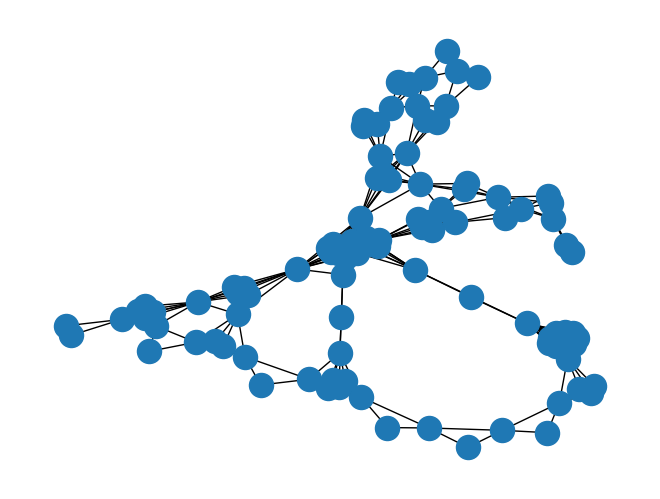

In [16]:
nx.draw(g)

In [7]:
for a in arr:
    print("".join(a))

###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############
